# Quantum Computing
***
This is a notebook on Quantum Computing.

Quantum Computing has been around since the 1980's when Paul Benioff first proposed it on a turning machine. A quantum computer is meant to simulate things that a normal computer can not feasibly do.

Quantum computers are needed to solve complex problems which can't be done with normal computers, such as poorly explained circumstances.

#### [IBM on Quantum Computing;](https://www.ibm.com/topics/quantum-computing)IBM
#### [Problems Computers can't solve;](https://www.inc.com/magazine/19820301/7600.html)Inc
#### [Intro exercises on Quantum Computing;](https://towardsdatascience.com/what-is-quantum-entanglement-anyway-4ea97df4bb0e)Towardsdatascience

### Quantum Operations
***

- Single Qubit gates these are U gate - P gate - Identity gate - Pauli gates - Clifford gates -  gates - Standard rotation gates, such gates are in tune with the rotations of the axis in some form, single qubit gates are made with xy plane in mind 
#### [Single Qubit gates;](https://www.sciencedirect.com/topics/mathematics/single-qubit#:~:text=2.2%20Single%20qubit%20gates,implemented%20using%20resonant%20RF%20pulses.)Sciencedirect


- Multi Qubit gates, space on a quantum computer grows exponentially, the tensor product of which a tensor is a representation of a quantum circuit. These tensor products combine together operators and basis vectors.
#### [Multi Qubit gates;](https://www.geeksforgeeks.org/what-is-multi-qubit-systems/.)Geeksforgeeks
#### [About Tensors;](https://pennylane.ai/qml/demos/tutorial_tn_circuits.html#:~:text=Every%20quantum%20circuit%20can%20be,these%20tensor%2Dnetwork%20quantum%20circuits.)Pennylane

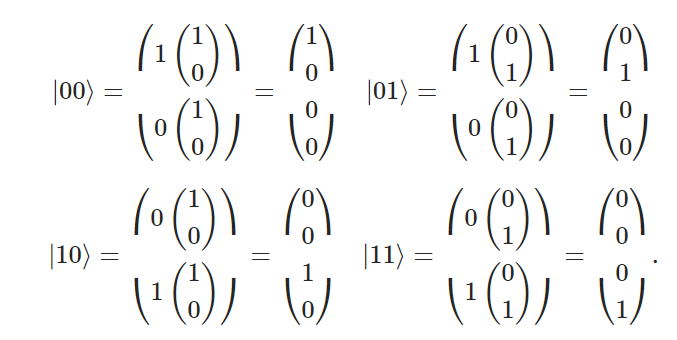

In [2]:
# qiskit is open source for using quantum computting
from qiskit import __version__

# Qiskit Visualisation contains functions that visualizes quantum states and more
import qiskit.visualization as viz

# Generating random numbers.
import numpy as np

# Plotting.
# seaborn is based on matplotlib for data visualization 
import seaborn as sns

# functions for randomising ints
import random

# provides fast way of looping to get different results
import itertools

# provides functions which can manipulate different parts of the Python runtime environment
import sys

# The tools needed
# Register is to define qubits
from qiskit import QuantumRegister, ClassicalRegister

# QuantumCircuit is computational routine
from qiskit import QuantumCircuit

# Aer is a high performance simulator
from qiskit import Aer

from qiskit import execute

# Qiskit.visualization allows to make cool plots 
import qiskit.visualization   
from qiskit.visualization import plot_histogram                                     

In [3]:
# allows us to do quantum simulation of measurements 
M_simulator=Aer.backends(name='qasm_simulator')[0]

#Qubits filled with two
qBits=QuantumRegister(2)

# Classical bits filled also with two
cBits=ClassicalRegister(2)

# Put qBits and cBits together to make a Quantum Circuit, called entangler
entangler=QuantumCircuit(qBits,cBits)

# Apply Hadamard gate to the first qubit 
entangler.h(0)

# Apply the CNOT gate with the first qubit as the control and second qubit as the target
entangler.cx(0,1)

# measure the first qubit and record it
entangler.measure(0,0)

# measure the second qubit and record it 
entangler.measure(1,1)

#entangler.draw(output='mpl')
print(entangler)

      ┌───┐     ┌─┐   
q0_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q0_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c0: 2/═══════════╩══╩═
                 0  1 


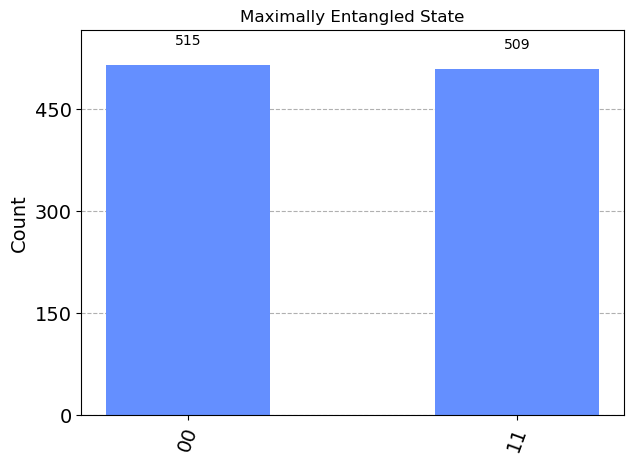

In [4]:
#executes numerous measurements
job=execute(entangler, M_simulator) 

#gives us histogram results 
hist=job.result().get_counts() 

#plot a stunning visualization
plot_histogram(data=hist, title="Maximally Entangled State")

## Flipping a Coin
***

In [5]:
# Flip one coin.
# binomial is a distribution which tells us the possibility of a variable will take one of two numbers/values
np.random.binomial(1, 0.5)

1

In [6]:
# Flip twenty coins.
# Random built in module to randomise numbers
np.random.binomial(1, 0.5, 20)

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0])

In [7]:
# Flip a coin one hundred times, counting total heads.
# changes everytime
np.random.binomial(100, 0.5)

52

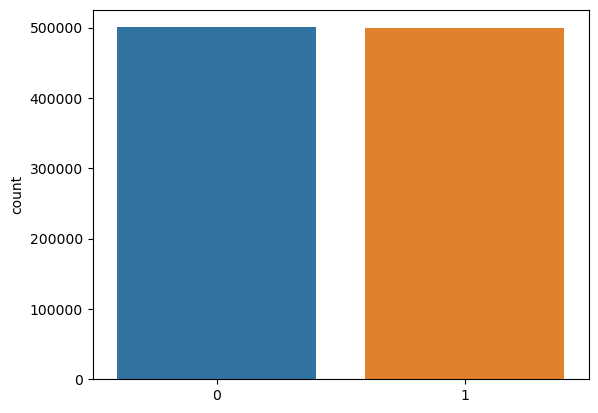

In [8]:
# Should be 50/50.
# show counts of observations
sns.countplot(x=np.random.binomial(1, 0.5, 1000000));

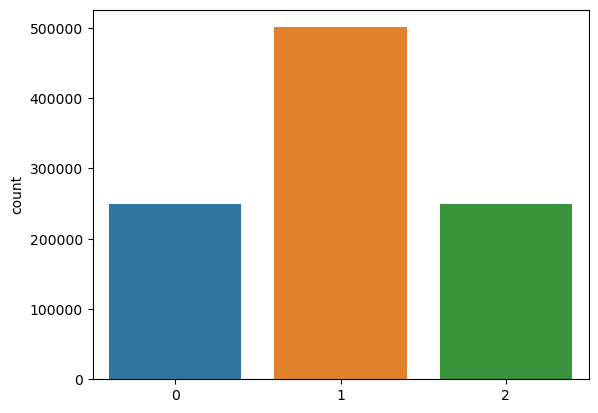

In [9]:
# Outcomes of flipping two coins.
sns.countplot(x=np.random.binomial(2, 0.5, 1000000));

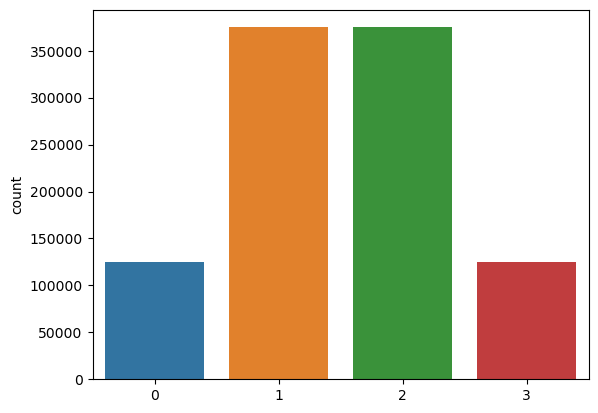

In [10]:
# Outcomes of flipping three coins.
sns.countplot(x=np.random.binomial(3, 0.5, 1000000));

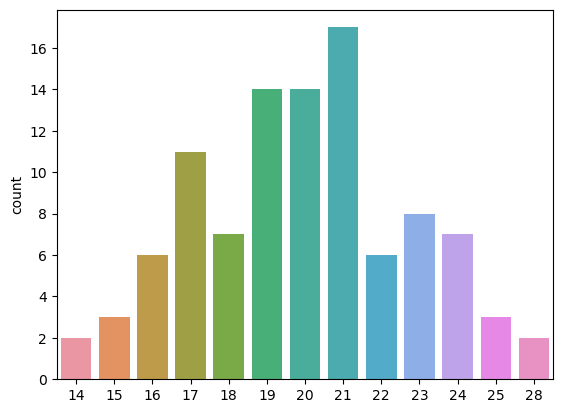

In [11]:
# Outcomes of flipping forty coins.
sns.countplot(x=np.random.binomial(40, 0.5, 100));

## Deutsch-Jozsa Algorithm
***
The Deutsch-Jozsa algorithm is was the first example of a quantum algorithm, that executes the classical algorithm better.

In [12]:
def f1(x):
    if x == 0:
        return 0
    else:
        return 0

In [13]:
def f2(x):
    if x == 0:
        return 0
    else:
        return 1

In [14]:
def f3(x):
    if x == 0:
        return 1
    else:
        return 0

In [15]:
def f4(x):
    if x == 0:
        return 1
    else:
        return 1

In [16]:
# Insert the above at random
# pointer to object f4 or f3 etc.
Y = [f1, f2, f3, f4]

f = random.choice(Y)

f(0)

1

In [17]:
# evaluate balenced constant
f(1)

0

In [18]:
list(itertools.product([0,1], repeat=2))

[(0, 0), (0, 1), (1, 0), (1, 1)]

In [19]:
def random_f():
    possible_Ls = list(itertools.product([0,1], repeat=2))
    chosen_L = random.choice(possible_Ls)
    
    # defining a function inside a function
    # name is scoped
    def f(x):
        return chosen_L[x]
    return f

In [20]:
f = random_f() # when we invoke this and it creates f so long as we have a pointer to f, garbage collecter won't pick it up
# random f should now be gone off the stack after the above

In [21]:
f(0)

0

In [22]:
#constant
f(1)

0

In [23]:
def random_f():
    possible_Ls = list(itertools.product([0,1], repeat=3))
    chosen_L = random.choice(possible_Ls)
    
    # defining a function inside a function
    # name is scoped
    def f(x):
        return chosen_L[x]
    return f

In [24]:
f = random_f()

f(0)

0

In [25]:
f(1)

0

## Quantum Gates
***
Quantum gates are logic based gates definitely the quantum circuit model of computation, these operations are carried out by a small number of qubits and are the foundation of quantum circuits

### H Gate
***
A h gate is a Hadamard gate and is the most frequent used quantum gate in quantum computting, it is used to convert qubits from a clustered state to a uniform one.

#### [Hadamard Gate;](https://www.sciencedirect.com/topics/engineering/hadamard-gate)Sciencedirect

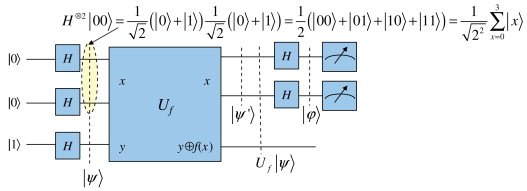

In [26]:
# Create a circuit which are collections of quantum gates
circuit = qiskit.QuantumCircuit(1, 1)

# Add a Hadamard gate.
circuit.h(0)

# Measure quantum bit into classical
circuit.measure(0, 0)

# print the circuit
print(circuit)

     ┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 


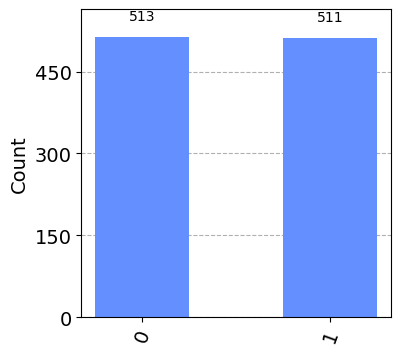

In [27]:
# Get a simulator, aer provides high perfomance quantum computing simulators
sim = qiskit.Aer.get_backend('aer_simulator')

# Simulte the circuit using run and get counts
result = sim.run(circuit).result().get_counts()

# plot the histogram using visualization
viz.plot_histogram(result, figsize=(4, 4))

### X Gate
***
Pauli-X gate is another name for the X gate, it is a single-qubit rotation through π radians around the x-axis

#### [Pauli-X Gate;](https://www.quantum-inspire.com/kbase/pauli-x/)Quantum-inspire

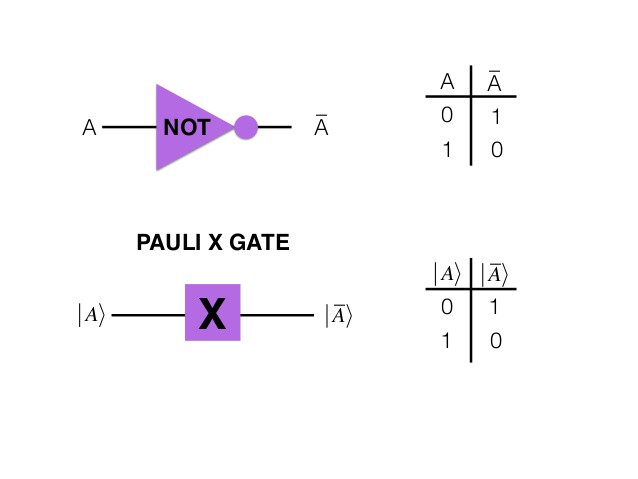

In [28]:
# Create a circuit.
circuit = qiskit.QuantumCircuit(1, 1)

# Add a gate.
circuit.x(0)

# Measure.
circuit.measure(0, 0)

# print the circuit
print(circuit)

     ┌───┐┌─┐
  q: ┤ X ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 


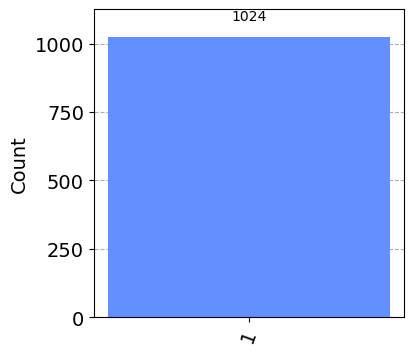

In [29]:
# Get a simulator.
sim = qiskit.Aer.get_backend('aer_simulator')

# Simulte the circuit.
result = sim.run(circuit).result().get_counts()

# Histogram.
viz.plot_histogram(result, figsize=(4, 4))

In [30]:
# An X-gate on a |0> qubit
qc = QuantumCircuit(1)

qc.x(0)

qc.draw()

┌───┐
q: ┤ X ├
   └───┘

### Y Gate
***
Like X, Y gate is a Pauli Gate. It is a a single-qubit rotation through π radians around the y-axis.

#### [Pauli-Y Gate;](https://deeplearninguniversity.com/qiskit/qiskit-y-gate/)Quantum-inspire

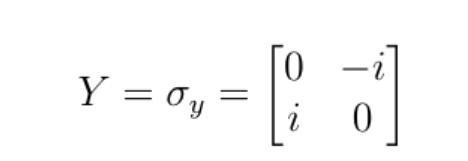

In [31]:
# Create a circuit.
circuit = qiskit.QuantumCircuit(1, 1)

# Add a gate.
circuit.y(0)

# Measure.
circuit.measure(0, 0)

# print the circuit
print(circuit)

     ┌───┐┌─┐
  q: ┤ Y ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 


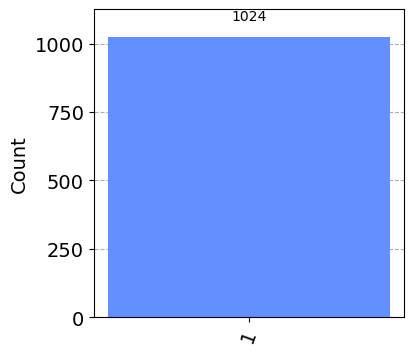

In [32]:
# Get a simulator.
sim = qiskit.Aer.get_backend('aer_simulator')

# Simulte the circuit.
result = sim.run(circuit).result().get_counts()

# Histogram.
viz.plot_histogram(result, figsize=(4, 4))

### Z Gate
***
Like X and Y, Z gate is a Pauli Gate. It is a a single-qubit rotation through π radians around the z-axis.

#### [Pauli-Z Gate;](https://medium.com/analytics-vidhya/quantum-gates-7fe83817b684)Medium

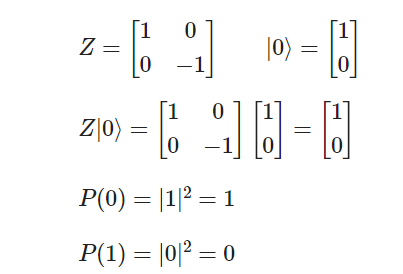

In [33]:
# Create a circuit.
circuit = qiskit.QuantumCircuit(1, 1)

# Add a gate.
circuit.z(0)

# Measure.
circuit.measure(0, 0)

# print the circuit
print(circuit)

     ┌───┐┌─┐
  q: ┤ Z ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 


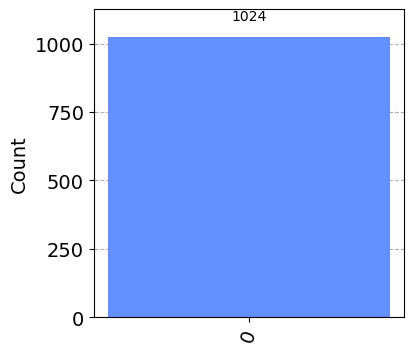

In [34]:
# Get a simulator.
sim = qiskit.Aer.get_backend('aer_simulator')

# Simulte the circuit.
result = sim.run(circuit).result().get_counts()

# Histogram.
viz.plot_histogram(result, figsize=(4, 4))

### T Gate
***
T gate is a very commonly used gate, it is a single-qubit operation given by: T

#### [T Gate;](https://www.quantum-inspire.com/kbase/t-gate/)Quantum-inspire

Single Qubit operation
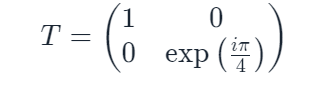

In [35]:
qc = QuantumCircuit(2)

#Apply T-gate to qubit 0
qc.t(0)

#Apply Tdg-gate to qubit 1
qc.tdg(1)

qc.draw()

┌───┐ 
q_0: ─┤ T ├─
     ┌┴───┴┐
q_1: ┤ Tdg ├
     └─────┘

In [36]:
# Create a circuit.
circuit = qiskit.QuantumCircuit(1, 1)

# Add a gate.
circuit.t(0)

# Measure.
circuit.measure(0, 0)

# print the circuit
print(circuit)

     ┌───┐┌─┐
  q: ┤ T ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 


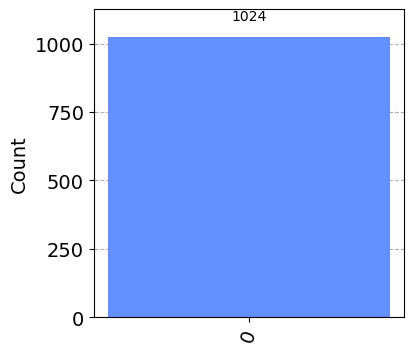

In [37]:
# Get a simulator.
sim = qiskit.Aer.get_backend('aer_simulator')

# Simulte the circuit.
result = sim.run(circuit).result().get_counts()

# Histogram.
viz.plot_histogram(result, figsize=(4, 4))

### CX Gate
***
CX is a controlled not gate, operates on a pair of qubits, one being the target and the other being the control. When control is in state it acts a NOT fucntion on the target. If the control is located at a superposition, the CX gates creates entanglement.

#### [CX Gate;](https://quantum-computing.ibm.com/composer/docs/iqx/operations_glossary/)Quantum-Computing.IBM

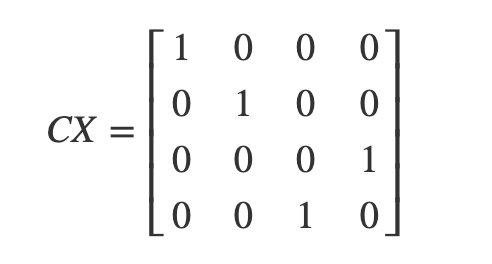

In [38]:
# system of many qubits
q = QuantumRegister(2)

# computational routine consisting of coherent quantum operations on qubits and more
qc = QuantumCircuit(q)

# using cx gate
qc.cx(q[0],q[1])

#draw
qc.draw()

q4_0: ──■──
      ┌─┴─┐
q4_1: ┤ X ├
      └───┘

In [39]:
# Create a circuit.
circuit = qiskit.QuantumCircuit(2, 2)

# Add a gate.
circuit.cnot(0, 1)

# Measure.
circuit.measure((0, 1), (0, 1))

# print the circuit
print(circuit)

          ┌─┐   
q_0: ──■──┤M├───
     ┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├─╫─┤M├
     └───┘ ║ └╥┘
c: 2/══════╩══╩═
           0  1 


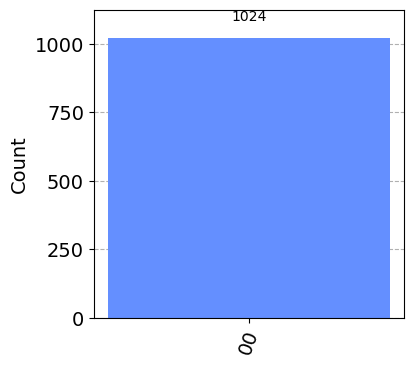

In [40]:
# Get a simulator.
sim = qiskit.Aer.get_backend('aer_simulator')

# Simulte the circuit.
result = sim.run(circuit).result().get_counts()

# Histogram.
viz.plot_histogram(result, figsize=(4, 4))

In [41]:
# Create a circuit.
circuit = qiskit.QuantumCircuit(2, 2)

# Set the first qubit to |1>.
circuit.x(0)

# Add a barrier.
circuit.barrier()

# Add a gate.
circuit.cnot(0, 1)

# Measure.
circuit.measure((0, 1), (0, 1))

# print the circuit
print(circuit)

     ┌───┐ ░      ┌─┐   
q_0: ┤ X ├─░───■──┤M├───
     └───┘ ░ ┌─┴─┐└╥┘┌─┐
q_1: ──────░─┤ X ├─╫─┤M├
           ░ └───┘ ║ └╥┘
c: 2/══════════════╩══╩═
                   0  1 


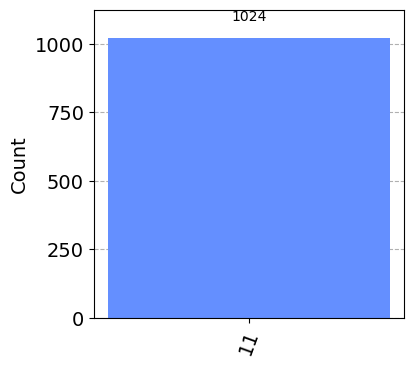

In [42]:
# Get a simulator.
sim = qiskit.Aer.get_backend('aer_simulator')

# Simulte the circuit.
result = sim.run(circuit).result().get_counts()

# Histogram.
viz.plot_histogram(result, figsize=(4, 4))

In [43]:
# Create a circuit.
circuit = qiskit.QuantumCircuit(2, 2)

# using and applying H gate to first qubit.
circuit.h(0)

# Add a gate.
circuit.cnot(0, 1)

# Measure.
circuit.measure((0, 1), (0, 1))

# print the circuit
print(circuit)

     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


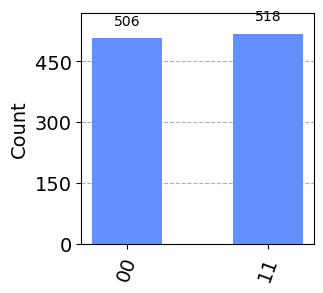

In [44]:
# Get a simulator.
sim = qiskit.Aer.get_backend('aer_simulator')

# Simulte the circuit.
result = sim.run(circuit).result().get_counts()

# Histogram.
viz.plot_histogram(result, figsize=(3, 3))

### SWAP Gate
***
The SWAP gate exchanges the two qubits.

#### [SWAP Gate;](https://www.quantum-inspire.com/kbase/swap/)Quantum-inspire

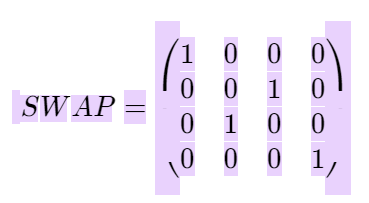

In [65]:
# using QuantumCircuit
qc = QuantumCircuit(q)

# applying swap gate
qc.swap(q[0], q[1])

# print
print(qc)

         
q5_0: ─X─
       │ 
q5_1: ─X─
         
q5_2: ───
         


### Toffoli Gate
***
Toffoli gate or ccx(Controlled-Controlled NOT gate) gate flips the third qubit if the first two qubits are |1>:

#### [Toffoli Gate;](https://www.quantum-inspire.com/kbase/toffoli/)Quantum-inspire

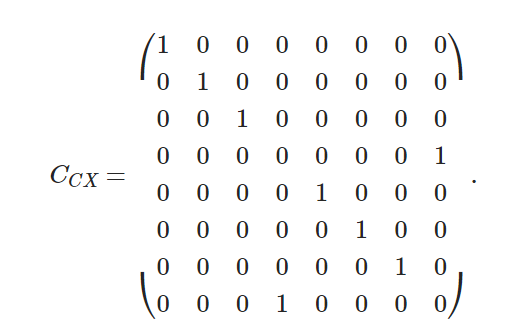

In [59]:
# using QuantumRegister & QuantumCircuit
q = QuantumRegister(3)
qc = QuantumCircuit(q)

# applyting gate
qc.ccx(q[0], q[1], q[2])

# print
print(qc)

           
q5_0: ──■──
        │  
q5_1: ──■──
      ┌─┴─┐
q5_2: ┤ X ├
      └───┘


### Oracles
***
An oracle is an unexposed operation that is used as input to another algorithm.

#### [Oracles;](https://quantumcomputing.stackexchange.com/questions/4625/what-exactly-is-an-oracle)Stackexchange

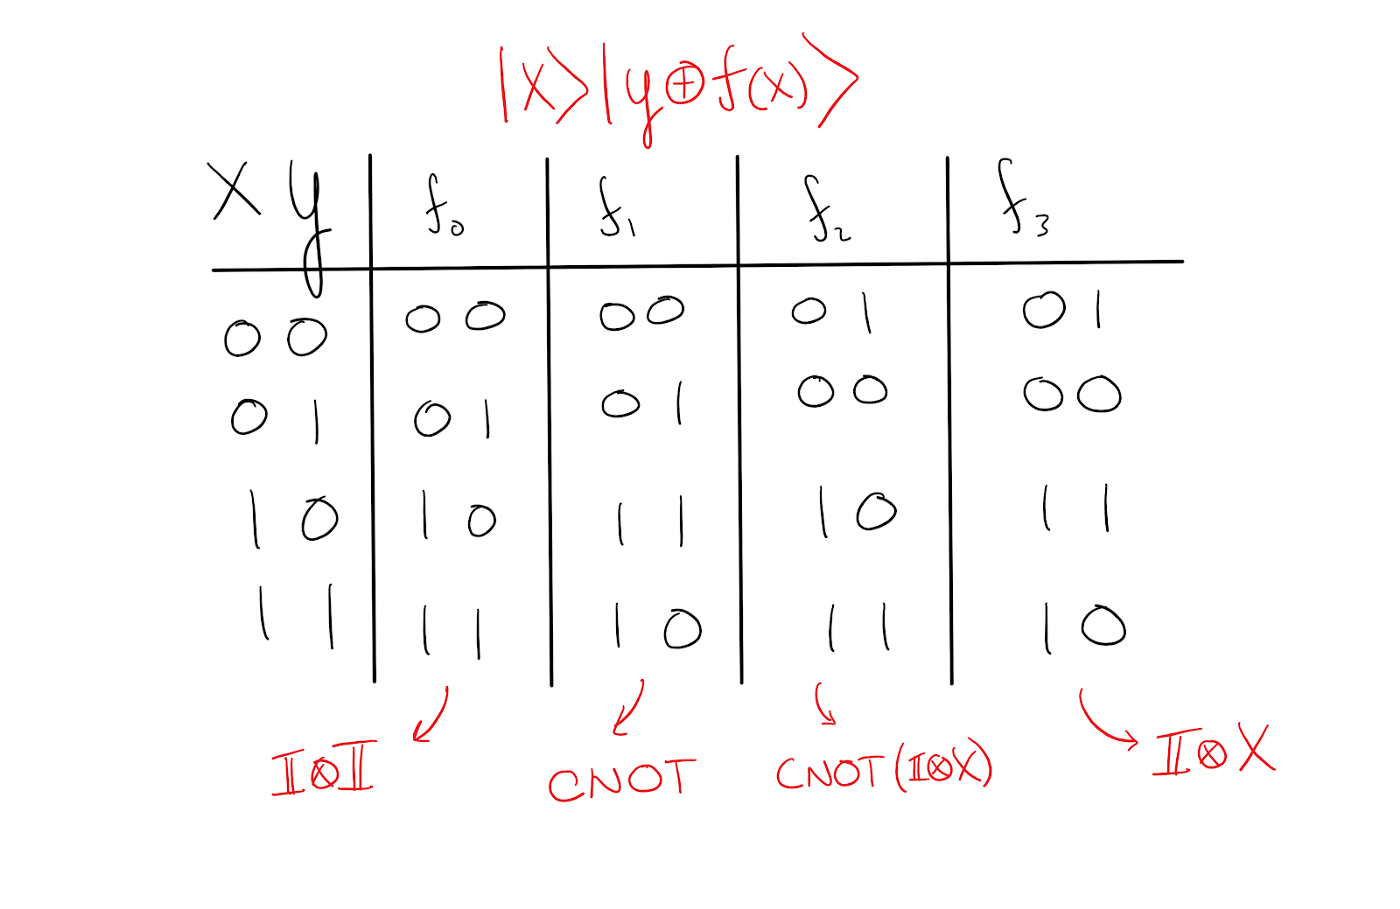

In [46]:
# using qiskit QuantumCircuit
top = qiskit.QuantumCircuit(2, 1)

# initialize oracle
top.initialize((1, 0), 0)
top.initialize((0, 1), 1)

# apply the h gate
top.h((0, 1))

# seperating the two circuits
top.barrier()

# print the circuit
print(top)

     ┌─────────────────┐┌───┐ ░ 
q_0: ┤ Initialize(1,0) ├┤ H ├─░─
     ├─────────────────┤├───┤ ░ 
q_1: ┤ Initialize(0,1) ├┤ H ├─░─
     └─────────────────┘└───┘ ░ 
c: 1/═══════════════════════════
                                


In [47]:
# using qiskit QuantumCircuit
end = qiskit.QuantumCircuit(2, 1)

# seperating the two circuits
end.barrier()

# apply the h gate
end.h(0)

# used for measuring qubits and mem_slots
end.measure(0, 0)

# print the circuit
print(end)

      ░ ┌───┐┌─┐
q_0: ─░─┤ H ├┤M├
      ░ └───┘└╥┘
q_1: ─░───────╫─
      ░       ║ 
c: 1/═════════╩═
              0 


### Constant 0 Function
A constant function is a fucntion in which the value is the same for every input in this case 0

In [61]:
f1 = qiskit.QuantumCircuit(2, 1)

f1.i((0, 1))

print(f1)

     ┌───┐
q_0: ┤ I ├
     ├───┤
q_1: ┤ I ├
     └───┘
c: 1/═════
          


In [63]:
circuit = top + f1 + end

print(circuit)

     ┌─────────────────┐┌───┐ ░ ┌───┐ ░ ┌───┐┌─┐
q_0: ┤ Initialize(1,0) ├┤ H ├─░─┤ I ├─░─┤ H ├┤M├
     ├─────────────────┤├───┤ ░ ├───┤ ░ └───┘└╥┘
q_1: ┤ Initialize(0,1) ├┤ H ├─░─┤ I ├─░───────╫─
     └─────────────────┘└───┘ ░ └───┘ ░       ║ 
c: 1/═════════════════════════════════════════╩═
                                              0 


C:\Users\G0037\AppData\Local\Temp\ipykernel_12480\1935872458.py:1: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circuit = top + f1 + end


In [64]:
sim = qiskit.Aer.get_backend('aer_simulator')

result = sim.run(circuit).result().get_counts()

print(result)

{'0': 1024}
